
# Exploring the Spotify Tracks Dataset
In this notebook I perform exploratory data analysis onto the Spotify tracks dataset sourced from kaggle.

As part of my analysis, I expse trends, patterns and relationships within the dataset.


## Table of Contents:
* [Import Libraries and Read the Dataset](#bullet-1)
* [Structural analysis of Dataset](#bullet-2)
* [Cleaning dataset](#bullet-3)
    * [Changing datatypes](#bullet-3a)
    * [Unique keys](#bullet-3b)

### styles
*Italic*, **bold**, _underscore_, ~~strikethrough~~
*bullet
    * sub bullet
        *sub sub bullet

        [link]*(www.google.com)

## Import Libraries and Read the Dataset <a class="anchor" id="bullet-1"></a>

Before I perform EDA, I first identify if there are any modifications or cleaning to be done. 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# sns.set(style="ticks", color_codes=True)

# Importing the data
tracks_df = pd.read_csv(r"C:\Users\AD676KL\OneDrive - EY\__Learning\_python\spotify\tracks.csv")
tracks_eda_df = tracks_df.copy()
tracks_eda_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
tracks_eda_df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [5]:
tracks_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
tracks_eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [7]:
# counting the number of zeros for each column
    # 1. pick the numeric columns
    # 2. count the values == 0 
cols = tracks_eda_df.select_dtypes(exclude='object').columns
for col in cols:
    print(col, (tracks_eda_df[col] == 0).sum())

popularity 44690
duration_ms 0
explicit 560808
danceability 328
energy 33
key 74950
loudness 0
mode 200174
speechiness 329
acousticness 66
instrumentalness 205083
liveness 43
valence 369
tempo 328
time_signature 337


## Structural analysis of Dataset <a class="anchor" id="bullet-2"></a>

Below, are my initial observations on the data, with next steps (pre-EDA) marked in red:

1. There are 20 columns in my data
2. Pandas has read 5 columns as objects:
    1. <font color=red>*'id'* should be string </font>
    2. <font color=red>*'name'* should be string </font>
    3. <font color=red>*'release_date'* should be datetime </font>
    3. *'artists'* is read a series of strings
    4. *'id_artists'* is read a series of strings
3. Key col is *'id'*, which identifies the unique songs
    1. <font color=red> are they truly unique? </font>
4. *'artists'* and *'id_artists'* contains **lists of values** for when multiple artists collaborate on a track
    1. if I want to do an artist level analysis, I'll have to explode this column across the dataset. this may result in duplicate tracks
5. *'release_date'* is **datetime**, but format seems a bit inconsistent
    1. I see these two date formats: YYYY-MM-DD & YYYY
    2. <font color=green> When converting to datetime, YYYY will read as first of january. for my purposes, I can accept this </font>
6. *'explicit'* is a **boolean** column
    1. contains 1 (True) or 0 (False)
7. *'duration'* is a **float** in milliseconds
8.  7 columns measure qualitative features of the tracks
    1. **floats** between 0 and 1
    2. *'danceability', 'energy'_, _'mode'_, _'speechiness'_, _'acousticness'_, _'instrumentalness'_, _'liveness'_, _'valence'_*
9. *'loudness'* describes the average loudness of the track in decibels
    1. **float** range from -60dB to 5.376dB
10. *'tempo'* describe the beats per min of a tracks
    1. **float**, values range from 0BPM to 246.381BPM
11. *'time_signature'* describes how many beats there are per bar
    1. **int** between 0 and 5
12. There are no null values
    1. Null values may present as 'zeros' in columns where zero is not a valid value
    2. This can be confirmed by checking for unique values of keys

In [8]:
# Converting the pd cols to appropriate datatypes
tracks_eda_df['id'] = tracks_eda_df['id'].astype('string')
tracks_eda_df['name'] = tracks_eda_df['name'].astype('string')
tracks_eda_df['release_date'] = pd.to_datetime(tracks_eda_df['release_date'])
tracks_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  string        
 1   name              586601 non-null  string        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

In [9]:
# Checking id column uniqueness
uniq = len(pd.unique(tracks_eda_df['id']))
print('are keys of the df unique?', uniq == len(tracks_eda_df.index))

are keys of the df unique? True


In [10]:
# Checking for null values post conversion
tracks_eda_df.isna().any()
# tracks_eda_df.loc[tracks_eda_df['name'] == pd.nan] #@TODO: ?? confused

id                  False
name                 True
popularity          False
duration_ms         False
explicit            False
artists             False
id_artists          False
release_date        False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
dtype: bool

In [16]:
# Investigating range of dates
print('Earliest date in the dataset:', min(tracks_eda_df['release_date']))
print('Latest date in the dataset:', max(tracks_eda_df['release_date']))


Earliest date in the dataset: 1900-01-01 00:00:00
Latest date in the dataset: 2021-04-16 00:00:00


## Visualising the data



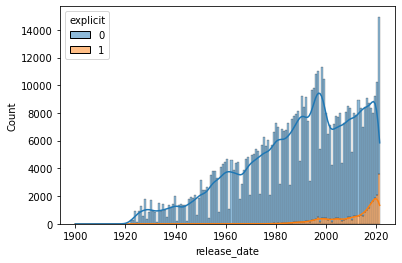

In [12]:
plt.figure()
sns.histplot(data=tracks_eda_df, x='release_date', hue='explicit',multiple='stack', kde=True)
plt.show()

In [20]:
plt.figure()
sns.boxplot(data=tracks_eda_df, x='release_date', orient="h")
plt.show()
# https://stackoverflow.com/questions/38567358/how-to-plot-pandas-datetime-series-in-seaborn-distplot

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 432x288 with 0 Axes>